In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('event_df_cleaned.csv',index_col='index')
train.head()

,cost_0,created_dt,end_local_dt,fee_0,id,published_dt,start_local_dt,tax_0,venue_id,created_to_publish,...,subcategory_id_16006.0,subcategory_id_16009.0,subcategory_id_16999.0,subcategory_id_17003.0,subcategory_id_18001.0,subcategory_id_19002.0,subcategory_id_19003.0,subcategory_id_19006.0,subcategory_id_19008.0,waitlist_available_0.0
index,,,,,,,,,,,,,,,,,,,,,
0,30.0,2018-06-07 13:32:09,2018-09-03 17:00:00,3.72,46844131057,2018-06-07 13:43:31,2018-09-03 09:00:00,0.0,25149064.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15.0,2018-07-28 19:47:56,2018-09-01 12:00:00,0.00,48522658578,2018-07-28 19:49:52,2018-09-01 11:00:00,0.0,20307481.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,135.0,2018-06-28 20:37:37,2018-09-01 21:00:00,0.00,47569506675,2018-06-28 20:37:40,2018-09-01 18:00:00,0.0,24881752.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20.0,2018-06-22 11:57:43,2018-09-01 12:00:00,1.19,47349009161,2018-06-22 11:58:27,2018-09-01 09:30:00,0.0,22394135.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,2018-08-05 23:27:51,2018-09-01 23:00:00,0.00,48782412509,2018-08-05 23:28:57,2018-09-01 21:30:00,0.0,22687889.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
print(list(train.columns))

['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt', 'start_local_dt', 'tax_0', 'venue_id', 'created_to_publish', 'publish_to_start', 'start_to_end', 'category_id_-999.0', 'category_id_101.0', 'category_id_102.0', 'category_id_103.0', 'category_id_104.0', 'category_id_105.0', 'category_id_106.0', 'category_id_107.0', 'category_id_108.0', 'category_id_109.0', 'category_id_110.0', 'category_id_111.0', 'category_id_112.0', 'category_id_113.0', 'category_id_114.0', 'category_id_115.0', 'category_id_116.0', 'category_id_117.0', 'category_id_118.0', 'category_id_119.0', 'category_id_120.0', 'country_AU', 'country_CA', 'country_GB', 'country_US', 'currency_AUD', 'currency_CAD', 'currency_EUR', 'currency_GBP', 'donation_0_0.0', 'format_id_-999.0', 'format_id_1.0', 'format_id_2.0', 'format_id_3.0', 'format_id_4.0', 'format_id_5.0', 'format_id_6.0', 'format_id_7.0', 'format_id_8.0', 'format_id_9.0', 'format_id_10.0', 'format_id_11.0', 'format_id_12.0', 'format_id_13.0', 'forma

In [4]:
train.columns[:12]

Index(['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
       'start_local_dt', 'tax_0', 'venue_id', 'created_to_publish',
       'publish_to_start', 'start_to_end'],
      dtype='object')

In [5]:
print('Benchmark for predicting tip percentage: %.4f' % train.cost_0.std())

Benchmark for predicting tip percentage: 1566.8137


In [6]:
from sklearn.model_selection import train_test_split

train_x = train.drop(labels=['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
                             'start_local_dt', 'tax_0', 'venue_id'],axis=1)
train_y = train['cost_0']
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=123)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

scl_model = scaler.fit(X_train.astype('float64'))
X_train_scl = scl_model.transform(X_train.astype('float64'))

l1_cv = LassoCV(cv=5,n_alphas=5)
l1_cv.fit(X_train_scl,y_train)

X_test_scl = scl_model.transform(X_test.astype('float64'))

y_pred_train = l1_cv.predict(X_train)
y_pred = l1_cv.predict(X_test)

print('***Training set***')
print('R squared score: %.4f' % l1_cv.score(X_train_scl,y_train))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred_train,y_train)))


print('\n**Test Set***')
print('R squared score: %.4f' % l1_cv.score(X_test_scl,y_test))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

print('\n\n')
print(pd.DataFrame(list(zip(X_train.columns,l1_cv.coef_)),columns=['feature','coefficient']))

***Training set***
R squared score: 0.0394
RMSE: 11266451.6828

**Test Set***
R squared score: 0.0297
RMSE: 11694367.6253



                    feature  coefficient
0        created_to_publish     0.000000
1          publish_to_start    78.714014
2              start_to_end     6.875458
3        category_id_-999.0    13.236451
4         category_id_101.0    19.886210
..                      ...          ...
247  subcategory_id_19002.0     0.000000
248  subcategory_id_19003.0    -0.000000
249  subcategory_id_19006.0    -0.000000
250  subcategory_id_19008.0    -0.000000
251  waitlist_available_0.0   -22.286370

[252 rows x 2 columns]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23718317.079256058, tolerance: 1032128.2072922798
  tol, rng, random, positive)


Decision Tree

In [8]:
# Make new train and test sets using all features
train_x = train.drop(labels=['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
                             'start_local_dt', 'tax_0', 'venue_id'],axis=1)
train_y = train['cost_0']

X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=123)

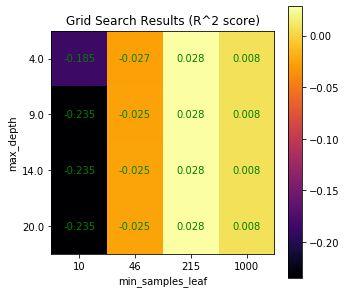

Best parameters:  {'max_depth': 14.0, 'min_samples_leaf': 215}
Train RMSE: 1300.4416
Test RMSE: 2251.4255


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def simple_tree(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

    # Create and fit decition tree
    dt = DecisionTreeRegressor()
    dt_reg = GridSearchCV(dt, parameters,cv=3)
    dt_reg.fit(X_train,y_train)

    # Plot heat map of R^2 scores
    scores = dt_reg.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()


    print('Best parameters: ',dt_reg.best_params_)

    y_pred_train = dt_reg.predict(X_train)
    y_pred = dt_reg.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

# Set values to test in grid search
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.logspace(1.0,3.0,num=4)))

simple_tree(max_depth,min_samples_leaf)

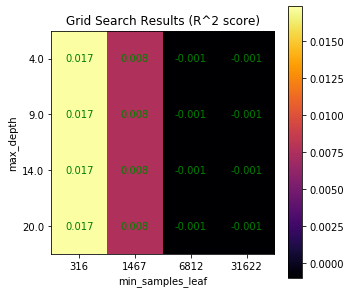

Best parameters:  {'max_depth': 4.0, 'min_samples_leaf': 316}
Train RMSE: 1309.3193
Test RMSE: 2257.4383


In [10]:
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.logspace(2.5,4.5,num=4)))

simple_tree(max_depth,min_samples_leaf)

Random Forest

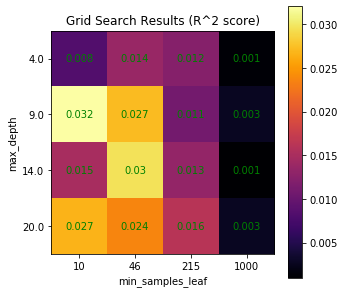

Best parameters:  {'max_depth': 9.0, 'min_samples_leaf': 10}
Train RMSE: 1296.7322
Test RMSE: 2248.4891


In [11]:
from sklearn.ensemble import RandomForestRegressor

def randomforest(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}
    
    # Create and fit random forest
    rf = RandomForestRegressor(n_estimators=10,max_features='sqrt')
    rf = GridSearchCV(rf, parameters,cv=3)
    rf.fit(X_train,y_train)

    scores = rf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    # Plot heatmap of R^2 values
    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()

    print('Best parameters: ',rf.best_params_)

    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

    pd.DataFrame(list(zip(X_train.columns,rf.best_estimator_.feature_importances_)))
    
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.floor(np.logspace(1.0,3.0,num=4))))

randomforest(max_depth,min_samples_leaf)

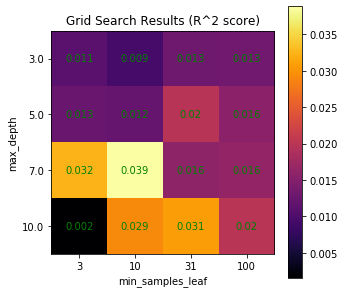

Best parameters:  {'max_depth': 7.0, 'min_samples_leaf': 10}
Train RMSE: 1292.0580
Test RMSE: 2234.0617


In [12]:
max_depth = np.floor(np.linspace(3,10,num=4))
min_samples_leaf = list(map(int,np.floor(np.logspace(0.5,2,num=4))))

randomforest(max_depth,min_samples_leaf)

Gradient boosted trees

Train RMSE: 242.7870
Test RMSE: 2248.8108

Feature Importances
                          0         1
0        created_to_publish  0.082645
1          publish_to_start  0.148383
2              start_to_end  0.047577
3        category_id_-999.0  0.088124
4         category_id_101.0  0.001406
..                      ...       ...
247  subcategory_id_19002.0  0.000000
248  subcategory_id_19003.0  0.000000
249  subcategory_id_19006.0  0.000000
250  subcategory_id_19008.0  0.000000
251  waitlist_available_0.0  0.036692

[252 rows x 2 columns]


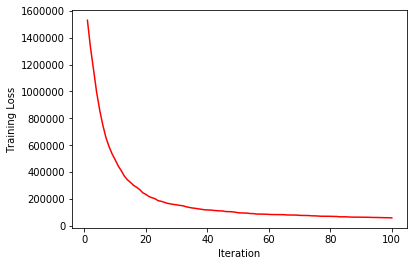

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def gradientBoostedTrees(n_estimators,learning_rate,max_depth):
    gbr=GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=n_est, subsample=1, max_depth =6)
    est=gbr.fit(X_train,y_train)

    #plot the train loss vs. iteration
    n = np.arange(n_est)+1
    plt.plot(n, est.train_score_,'r-')
    plt.ylabel('Training Loss')
    plt.xlabel('Iteration')

    y_pred_train = gbr.predict(X_train)
    y_pred = gbr.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))
    
    print('\nFeature Importances')
    print(pd.DataFrame(list(zip(X_train.columns,gbr.feature_importances_))))

n_est=100
lr=0.1
max_depth=6

gradientBoostedTrees(n_est,lr,max_depth)

## Try just one category | 108: Business & Professional

In [14]:
train = train.loc[train['category_id_101.0']==1]

In [15]:
train.shape

(2370, 261)

In [16]:
train.cost_0.std()

784.8923309918309

In [17]:
from sklearn.model_selection import train_test_split

train_x = train.drop(labels=['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
                             'start_local_dt', 'tax_0', 'venue_id','category_id_101.0'],axis=1)
train_y = train['cost_0']
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=123)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

scl_model = scaler.fit(X_train.astype('float64'))
X_train_scl = scl_model.transform(X_train.astype('float64'))

l1_cv = LassoCV(cv=5,n_alphas=5)
l1_cv.fit(X_train_scl,y_train)

X_test_scl = scl_model.transform(X_test.astype('float64'))

y_pred_train = l1_cv.predict(X_train)
y_pred = l1_cv.predict(X_test)

print('***Training set***')
print('R squared score: %.4f' % l1_cv.score(X_train_scl,y_train))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred_train,y_train)))


print('\n**Test Set***')
print('R squared score: %.4f' % l1_cv.score(X_test_scl,y_test))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

print('\n\n')
print(pd.DataFrame(list(zip(X_train.columns,l1_cv.coef_)),columns=['feature','coefficient']))

***Training set***
R squared score: 0.0741
RMSE: 15917991.9225

**Test Set***
R squared score: 0.0651
RMSE: 18082677.5891



                    feature  coefficient
0        created_to_publish    -0.000000
1          publish_to_start    92.441464
2              start_to_end    -0.000000
3        category_id_-999.0     0.000000
4         category_id_102.0     0.000000
..                      ...          ...
246  subcategory_id_19002.0     0.000000
247  subcategory_id_19003.0     0.000000
248  subcategory_id_19006.0     0.000000
249  subcategory_id_19008.0     0.000000
250  waitlist_available_0.0    -0.000000

[251 rows x 2 columns]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17184368.42098856, tolerance: 105811.60253115633
  tol, rng, random, positive)


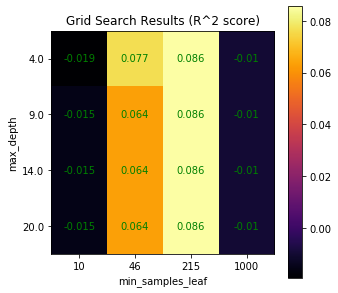

Best parameters:  {'max_depth': 4.0, 'min_samples_leaf': 215}
Train RMSE: 759.9431
Test RMSE: 721.7586


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def simple_tree(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

    # Create and fit decition tree
    dt = DecisionTreeRegressor()
    dt_reg = GridSearchCV(dt, parameters,cv=3)
    dt_reg.fit(X_train,y_train)

    # Plot heat map of R^2 scores
    scores = dt_reg.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()


    print('Best parameters: ',dt_reg.best_params_)

    y_pred_train = dt_reg.predict(X_train)
    y_pred = dt_reg.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

# Set values to test in grid search
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.logspace(1.0,3.0,num=4)))

simple_tree(max_depth,min_samples_leaf)

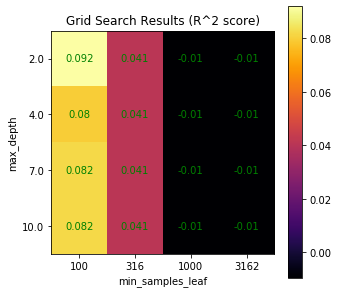

Best parameters:  {'max_depth': 2.0, 'min_samples_leaf': 100}
Train RMSE: 755.2103
Test RMSE: 723.6980


In [20]:
# Set values to test in grid search
max_depth = np.floor(np.linspace(2,10,num=4))
min_samples_leaf = list(map(int,np.logspace(2.0,3.5,num=4)))

simple_tree(max_depth,min_samples_leaf)

Train RMSE: 96.7462
Test RMSE: 735.1988

Feature Importances
                          0         1
0        created_to_publish  0.046794
1          publish_to_start  0.350744
2              start_to_end  0.201103
3        category_id_-999.0  0.000000
4         category_id_102.0  0.000000
..                      ...       ...
246  subcategory_id_19002.0  0.000000
247  subcategory_id_19003.0  0.000000
248  subcategory_id_19006.0  0.000000
249  subcategory_id_19008.0  0.000000
250  waitlist_available_0.0  0.000854

[251 rows x 2 columns]


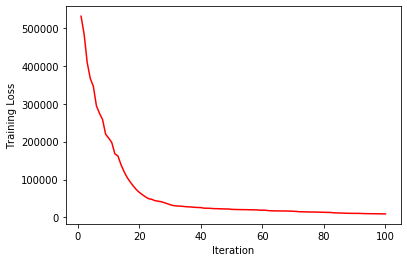

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def gradientBoostedTrees(n_estimators,learning_rate,max_depth):
    gbt=GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=n_est, subsample=1, max_depth =6)
    est=gbt.fit(X_train,y_train)

    #plot the train loss vs. iteration
    n = np.arange(n_est)+1
    plt.plot(n, est.train_score_,'r-')
    plt.ylabel('Training Loss')
    plt.xlabel('Iteration')

    y_pred_train = gbt.predict(X_train)
    y_pred = gbt.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))
    
    print('\nFeature Importances')
    print(pd.DataFrame(list(zip(X_train.columns,gbt.feature_importances_))))
    
    return gbt

n_est=100
lr=0.1
max_depth=6

gbt = gradientBoostedTrees(n_est,lr,max_depth)

In [22]:
import pickle

pkl_filename = 'RightPrice_GBT_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(gbt, file)

In [23]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

score = pickle_model.score(X_test,y_test)
print(score)
Ypredict = pickle_model.predict(X_test)
print(np.sqrt(mean_squared_error(Ypredict,y_test)))

0.0397807237667801
735.1988439216321
